# What team/teams were the most-X among whole league in 2013-2023?
### Things to explore:
1. The most victorious?
2. The most unsuccesful?
3. The most mediocre?

Data source:
https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('databases/cbb.csv', header=None, skiprows=1)

header = pd.read_csv('databases/cbb.csv', nrows=1, header=None).iloc[0].tolist()
df.columns = header

df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023


## Filtering data for better results

Excluding teams that have participated in less than ten seasons in total - for example, due to fresh promotion to the league, which would be unfair and the set of teams would not be equalized.

In [3]:
df_grouped = df.groupby('TEAM')['YEAR'].size()

teams_all_years = df_grouped[df_grouped == 10]
df_all_years = df[df['TEAM'].isin(teams_all_years.index)]

df_excluded_teams = df[~df['TEAM'].isin(teams_all_years.index)]
print(f'Excluded teams: {df_excluded_teams['TEAM'].unique()}\n')

print(f"Dataset before excluding teams: {df.shape}")
print(f"Dataset after excluding teams: {df_all_years.shape}")

Excluded teams: ['UMass Lowell' 'North Alabama' 'Brown' 'Columbia' 'Cornell' 'Dartmouth'
 'Penn' 'Princeton' 'Yale' 'Harvard' 'Bethune Cookman'
 'Maryland Eastern Shore' 'Savannah St.' 'Arkansas Little Rock'
 'Little Rock' 'Abilene Christian' 'Houston Baptist' 'Incarnate Word'
 'IPFW' 'Fort Wayne' 'Grand Canyon' 'Cal Baptist' 'UC San Diego'
 'Dixie St.' 'Merrimack' 'Tarleton St.' 'Bellarmine' 'Utah Tech'
 'St. Thomas' 'Houston Christian' 'Lindenwood' 'Texas A&M Commerce'
 'Stonehill' 'Southern Indiana' 'Queens']

Dataset before excluding teams: (3523, 24)
Dataset after excluding teams: (3330, 24)


## Most victorious teams
“Most victorious” can be interpreted as: the most matches won or the highest number of championships

### Highest number of championships in 2013-2023

In [45]:
victorious = df_all_years[df_all_years['POSTSEASON'] == 'Champions'].groupby('TEAM').size().reset_index(name='Championships').sort_values(by='Championships', ascending=False)
victorious

,TEAM,Championships
1,Connecticut,2
6,Villanova,2
0,Baylor,1
2,Duke,1
3,Kansas,1
4,Louisville,1
5,North Carolina,1
7,Virginia,1


<function matplotlib.pyplot.show(close=None, block=None)>

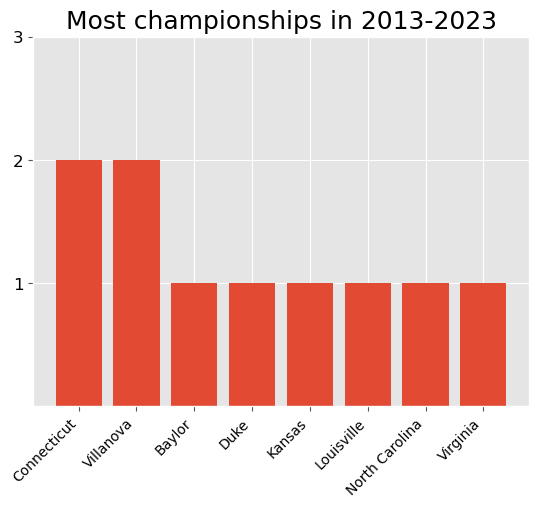

In [46]:
plt.bar(victorious['TEAM'], victorious['Championships'])
plt.yticks([1,2,3], fontsize=12, color='black')
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')
plt.style.use('ggplot')
plt.title('Most championships in 2013-2023', fontsize=18)
plt.show

### Most games won in 2013-2023

In [47]:
most_wins = (df_all_years.groupby('TEAM')['W'].sum().reset_index().sort_values(by='W', ascending=False)).iloc[:6,]
most_wins.index = [0,1,2,3,4,5]
most_wins

,TEAM,W
0,Gonzaga,307
1,Kansas,285
2,Duke,277
3,Villanova,273
4,Arizona,273
5,Virginia,265


<function matplotlib.pyplot.show(close=None, block=None)>

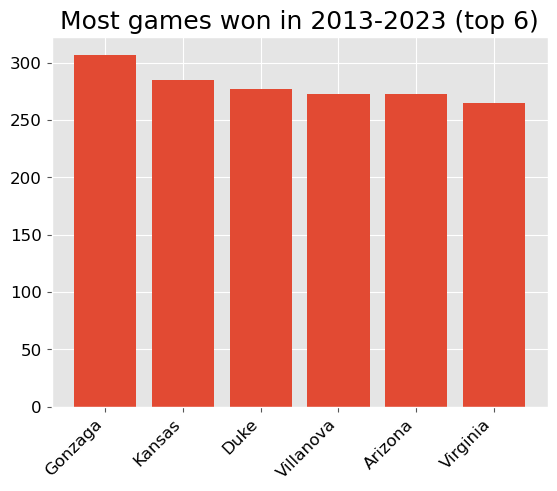

In [48]:
plt.bar(most_wins['TEAM'], most_wins['W'])
plt.yticks(fontsize=12, color='black')
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')
plt.style.use('ggplot')
plt.title('Most games won in 2013-2023 (top 6)', fontsize=18)
plt.show

#### Chart showing the above teams comparing their number of wins with their performance in the playoffs year after year

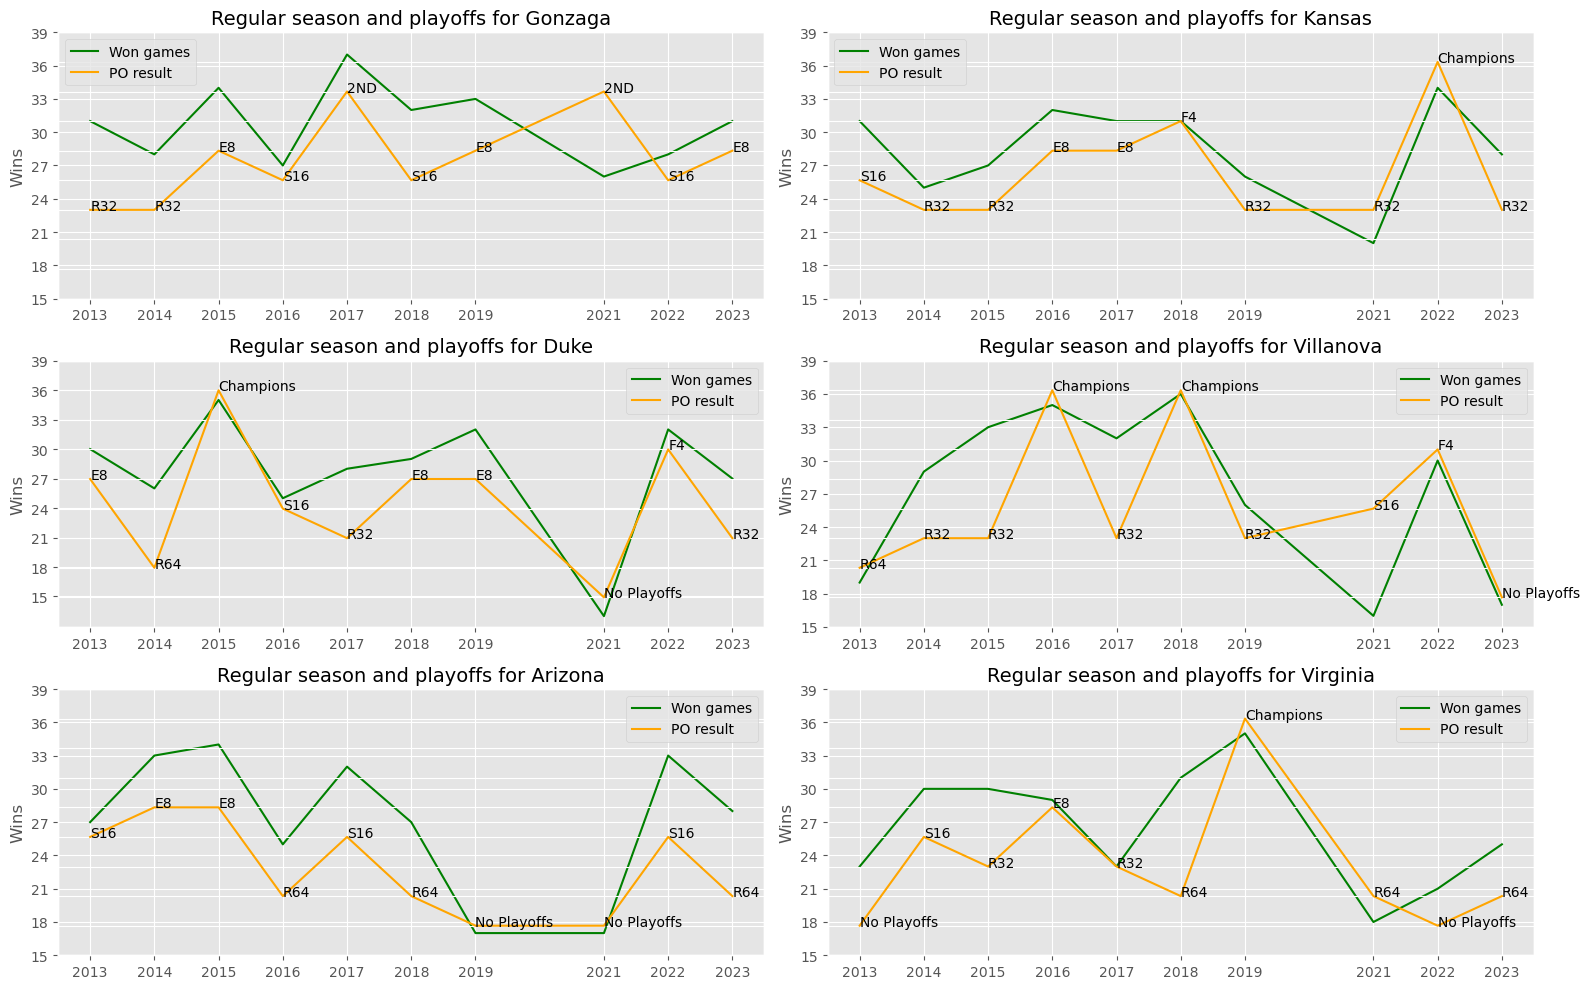

In [66]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
for i, ax in enumerate(axes.flat):
    current_team = most_wins.iloc[i]['TEAM']
    df_team = df_all_years[df_all_years['TEAM']== current_team].sort_values(by='YEAR').reset_index(drop=True)
    
    postseason_mapping = {"R68": 1, "R64": 1, "R32": 2, "S16": 3, "E8": 4, "F4": 5, "2ND": 6, "Champions": 7, "No Playoffs": 0}
    df_team['POSTSEASON'] = df_team['POSTSEASON'].fillna("No Playoffs")
    df_team['POSTSEASON_MAP'] = df_team['POSTSEASON'].map(postseason_mapping)
    
    w_games, = ax.plot(df_team["YEAR"], df_team["W"], color="green", label="Won games")
    ax2 = ax.twinx()
    PO_results, = ax2.plot(df_team["YEAR"], df_team["POSTSEASON_MAP"], color="orange", label="PO result")
    ax2.set_ylabel("")
    
    ax.set_yticks([15, 18, 21, 24, 27, 30, 33, 36, 39])
    
    ax2.set_yticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax2.set_yticklabels([])
    ax2.tick_params(axis='y', which='both', length=0)

    for x, txt in enumerate(df_team["POSTSEASON"]):
        ax2.text(df_team["YEAR"][x], df_team["POSTSEASON_MAP"][x], txt)
    
    ax.set_xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023])
    ax.set_xticklabels(["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2021", "2022", "2023"], fontsize=10)  # Opisy etykiet
    ax.set_title(f'Regular season and playoffs for {current_team}', fontsize=14)
    ax.set_ylabel('Wins')
    plt.legend(handles=[w_games, PO_results], loc=0)

    plt.tight_layout()
plt.show()

## Most unsuccesful teams
In the sense of least number of games won in the period 2013-2023

In [40]:
least_wins = (df_all_years.groupby('TEAM')['W'].sum().reset_index().sort_values(by='W', ascending=True)).iloc[:6,]
least_wins.index = [0,1,2,3,4,5]
least_wins

,TEAM,W
0,Mississippi Valley St.,51
1,Chicago St.,54
2,Maine,65
3,Delaware St.,72
4,San Jose St.,75
5,Coppin St.,80


<function matplotlib.pyplot.show(close=None, block=None)>

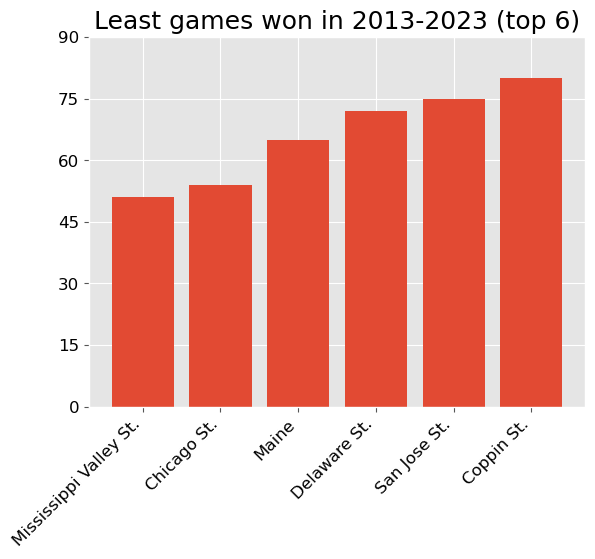

In [43]:
plt.bar(least_wins['TEAM'], least_wins['W'])
plt.yticks([0, 15, 30, 45, 60, 75, 90], fontsize=12, color='black')
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')
plt.style.use('ggplot')
plt.title('Least games won in 2013-2023 (top 6)', fontsize=18)
plt.show

### Chart showing the above teams their number of wins year after year

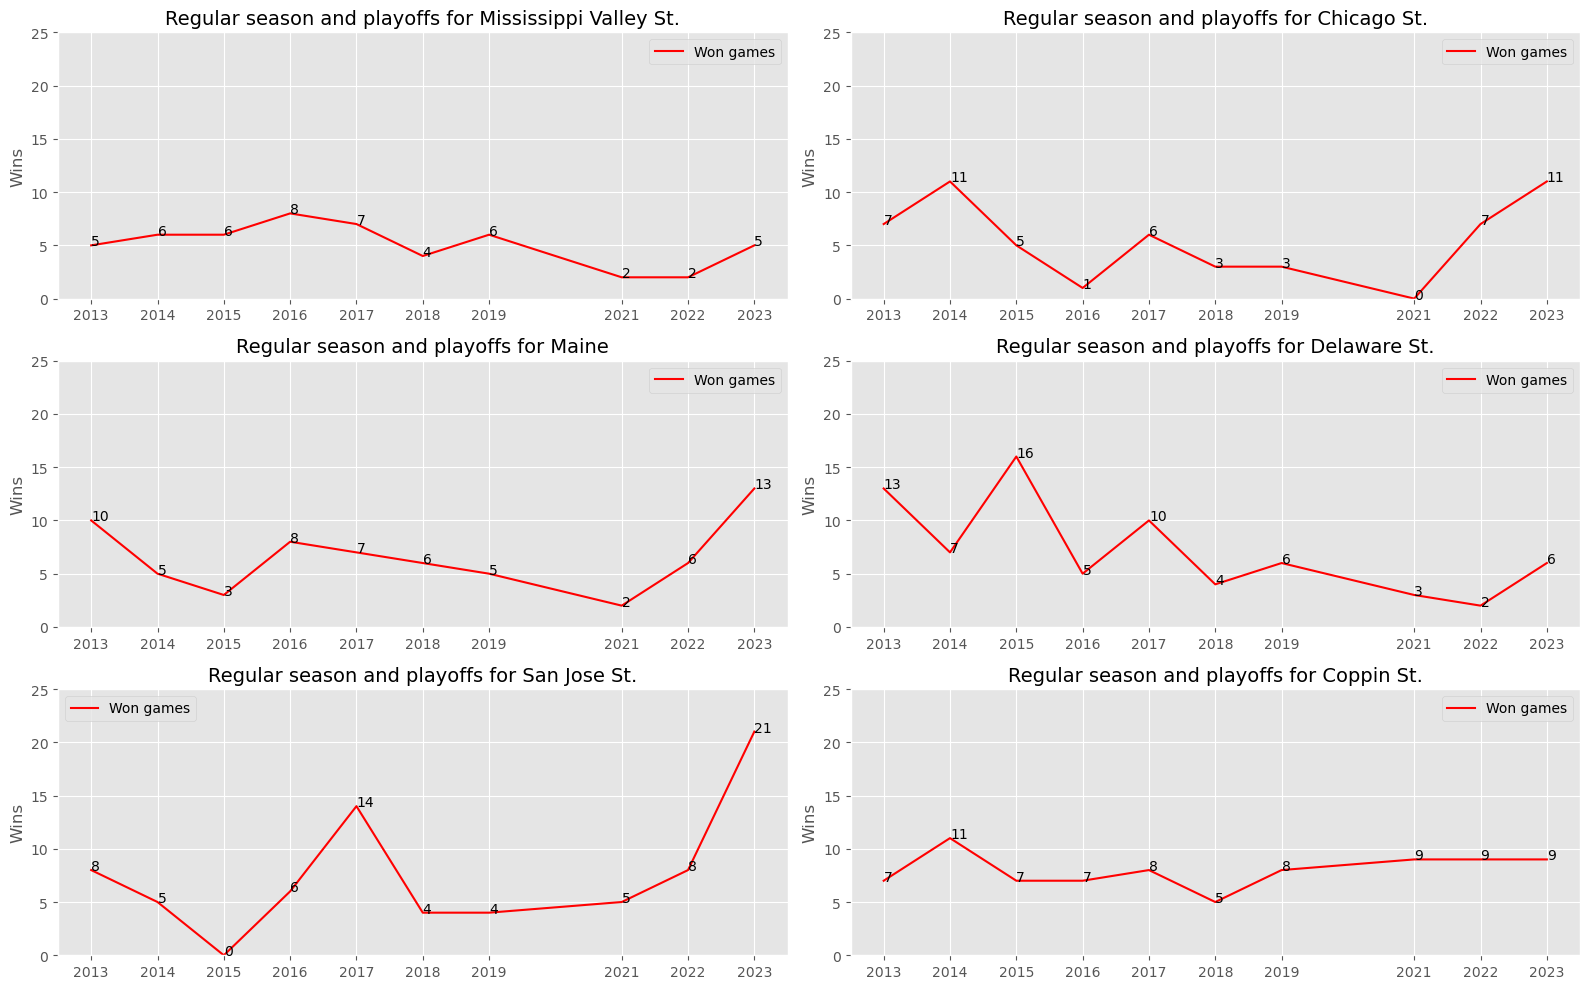

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
for i, ax in enumerate(axes.flat):
    current_team = least_wins.iloc[i]['TEAM']
    df_team = df_all_years[df_all_years['TEAM']== current_team].sort_values(by='YEAR').reset_index(drop=True)
    
    ax.plot(df_team["YEAR"], df_team["W"], color="red", label="Won games")
        
    ax.set_xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023])
    ax.set_xticklabels(["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2021", "2022", "2023"], fontsize=10)  # Opisy etykiet
    ax.set_ylim(0, 25)

    for x, txt in enumerate(df_team["W"]):
        ax.text(df_team["YEAR"][x], df_team["W"][x], txt, fontsize=10)
    
    ax.set_title(f'Regular season and playoffs for {current_team}', fontsize=14)
    ax.set_ylabel('Wins')
    ax.legend()

    plt.tight_layout()
plt.show()

Note: no team from above achieved appearance in playoffs

## Most mediocre team in 2013-2023

In [6]:
df_all_years['SEED_PRESENT'] = df_all_years['SEED'].notna().astype(int)

In [7]:
df_all_years = df_all_years.sort_values(by='YEAR').reset_index(drop=True)

postseason_mapping = {"R68": 1, "R64": 1, "R32": 2, "S16": 3, "E8": 4, "F4": 5, "2ND": 6, "Champions": 7, "No Playoffs": 0}
df_all_years['POSTSEASON'] = df_all_years['POSTSEASON'].fillna("No Playoffs")
df_all_years['POSTSEASON_MAP'] = df_all_years['POSTSEASON'].map(postseason_mapping)

df_all_years[df_all_years['YEAR']==2018].sample(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,SEED_PRESENT,POSTSEASON_MAP
1874,Providence,BE,35,21,108.4,95.9,0.8027,49.6,50.3,17.4,...,51.5,33.2,32.2,68.3,1.9,R64,10.0,2018,1,1
1696,Bryant,NEC,31,3,98.3,119.8,0.0936,47.9,57.6,18.2,...,55.4,34.4,40.5,71.3,-23.0,No Playoffs,NaN,2018,0,0
1855,Miami FL,ACC,32,22,113.3,96.6,0.8623,53.1,49.0,16.8,...,48.8,36.4,32.8,68.2,2.7,R64,6.0,2018,1,1
1788,UCF,Amer,32,19,97.4,93.5,0.6165,47.8,45.7,20.7,...,43.7,32.9,33.1,65.8,-3.4,No Playoffs,NaN,2018,0,0
1789,Evansville,MVC,30,17,97.6,95.4,0.5674,48.7,49.8,20.9,...,48.5,39.8,34.4,66.7,-7.7,No Playoffs,NaN,2018,0,0
1851,Georgetown,BE,30,15,111.5,100.4,0.7688,51.8,50.8,20.7,...,49.9,36.6,34.8,71.4,-3.5,No Playoffs,NaN,2018,0,0
1691,Saint Peter's,MAAC,32,14,94.5,99.3,0.3625,49.2,48.4,19.6,...,47.8,33.7,32.9,63.9,-13.0,No Playoffs,NaN,2018,0,0
1939,Fordham,A10,31,9,94.1,104.9,0.2223,47.9,52.3,18.5,...,52.1,28.8,35.1,67.2,-14.9,No Playoffs,NaN,2018,0,0
1735,Oral Roberts,Sum,28,11,104.8,111.8,0.3222,48.9,54.2,19.0,...,53.9,34.2,36.5,66.7,-12.0,No Playoffs,NaN,2018,0,0
1665,Southeastern Louisiana,Slnd,31,22,102.7,104.8,0.4426,51.2,49.6,19.6,...,48.4,34.4,34.6,67.2,-6.5,No Playoffs,NaN,2018,0,0


### Creating PROGRESS feature
**team_list** containing unique teams' names required in future function. Also creating a copy of the main dataframe **df_all_years**, which will store new **PROGRESS** feature

In [8]:
team_list = df_all_years['TEAM'].unique().tolist()

df_all_years_progress = df_all_years.copy(deep=False)
df_all_years_progress.drop(df_all_years_progress.index, inplace=True)
df_all_years_progress['PROGRESS'] = np.nan

display('main dataframe - df_all_years:',df_all_years)
display('copy of df_all_years - df_all_years_progress:',df_all_years_progress)

'main dataframe - df_all_years:'

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,SEED_PRESENT,POSTSEASON_MAP
0,Drexel,CAA,31,13,100.1,100.1,0.5003,46.7,48.7,18.9,...,47.5,33.5,34.2,61.9,-11.9,No Playoffs,NaN,2013,0,0
1,Mercer,ASun,34,22,102.3,98.6,0.6042,50.3,46.7,19.5,...,43.7,35.4,34.5,62.8,-5.6,No Playoffs,NaN,2013,0,0
2,North Dakota St.,Sum,32,22,102.1,94.2,0.7167,52.8,44.4,18.1,...,42.3,35.8,32.4,60.8,-3.6,No Playoffs,NaN,2013,0,0
3,Baylor,B12,36,22,112.4,95.3,0.8698,51.6,45.7,17.2,...,44.7,34.9,32.2,67.6,-2.5,No Playoffs,NaN,2013,0,0
4,Denver,WAC,32,22,109.0,94.8,0.8338,56.2,47.3,18.6,...,46.5,37.5,33.1,59.1,-2.7,No Playoffs,NaN,2013,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,Sam Houston St.,WAC,30,26,103.9,93.6,0.7682,50.7,49.0,19.9,...,46.6,37.8,34.5,64.4,0.1,No Playoffs,NaN,2023,0,0
3326,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,52.1,39.7,36.1,69.5,-1.2,No Playoffs,NaN,2023,0,0
3327,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,48.6,36.4,33.6,64.4,-2.0,No Playoffs,NaN,2023,0,0
3328,Eastern Washington,BSky,33,23,109.9,106.4,0.5913,56.2,50.2,19.9,...,50.2,35.5,33.4,68.5,-4.2,No Playoffs,NaN,2023,0,0


'copy of df_all_years - df_all_years_progress:'

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,SEED_PRESENT,POSTSEASON_MAP,PROGRESS


**add_row** function which adds a row containing team's progress to freshly created **df_all_years_progress** (copy of **df_all_years**)

In [9]:
def add_row(year, team, progress, df_all_years_progress):
    row = df_all_years.loc[(df_all_years['YEAR'] == year) & (df_all_years['TEAM'] == team)].copy()
    row['PROGRESS'] = progress
    
    return pd.concat([df_all_years_progress, row], ignore_index=True)

Iterating over each team in **team_list** and checking its progresss comparing previous and present year. Then, calling **add_row** function where **PROGRESS** is added to other features and saved to **df_all_years_progress**

In [10]:
for team in team_list:
    df_team = df_all_years[df_all_years['TEAM'] == team]
    for year in df_team['YEAR'].iloc[1:]:
        if year == 2021:
            progress = (df_team.loc[df_team['YEAR'] == year, 'POSTSEASON_MAP'].iloc[0]) - (df_team.loc[df_team['YEAR'] == year-2, 'POSTSEASON_MAP'].iloc[0])
        else:
            progress = (df_team.loc[df_team['YEAR'] == year, 'POSTSEASON_MAP'].iloc[0]) - (df_team.loc[df_team['YEAR'] == year-1, 'POSTSEASON_MAP'].iloc[0])
        df_all_years_progress = add_row(year, team, progress, df_all_years_progress)

For the purposes of the issue, the only information needed about the team is progression, appearance in the playoffs and result in the playoffs.

This is why **df_sum** will containt this set of features grouped and summed, also sorted by **SEED_PRESENT**

In [11]:
df_sum = df_all_years_progress.groupby('TEAM')[['PROGRESS', 'SEED_PRESENT', 'POSTSEASON_MAP']].sum().reset_index().sort_values(by='SEED_PRESENT', ascending=False)
df_sum

,TEAM,PROGRESS,SEED_PRESENT,POSTSEASON_MAP
120,Kansas,-1.0,9,30
155,Michigan St.,0.0,9,25
94,Gonzaga,2.0,9,35
124,Kentucky,2.0,8,27
183,North Carolina,-2.0,8,30
...,...,...,...,...
163,Missouri St.,0.0,0,0
164,Monmouth,0.0,0,0
168,Morgan St.,0.0,0,0
171,NJIT,0.0,0,0


#### The term “most mediocre/average” team can be interpreted differently.

Let's accept the definition that it is a team that:
1. Was often in the playoffs
2. Had a low aggregate progression over the years

So: teams which have been in playoffs a lot, but not significant progress were seen, neither good nor bad

We will sum the **PROGRESS** feature up in absolute value to count how much in total the teams changed their results

In [12]:
team_dict = {}
for team in team_list:
    team_dict[team] = (df_all_years_progress[df_all_years_progress['TEAM'] == team]['PROGRESS']).abs().sum()
    
df_teams_PROGRESS_CHANGE = pd.DataFrame(list(team_dict.items()), columns=['TEAM', 'CHANGE_PROGRESS'])
df_teams_PROGRESS_CHANGE

,TEAM,CHANGE_PROGRESS
0,Drexel,2.0
1,Mercer,4.0
2,North Dakota St.,6.0
3,Baylor,22.0
4,Denver,0.0
...,...,...
328,Maine,0.0
329,Utah Valley,0.0
330,Pepperdine,0.0
331,Tennessee Tech,0.0


In [15]:
mediocre_teams = pd.merge(df_teams_PROGRESS_CHANGE, df_sum, on='TEAM')
mediocre_teams = mediocre_teams[mediocre_teams['SEED_PRESENT'] > 5].sort_values(by='CHANGE_PROGRESS').reset_index(drop=True).head(4)
mediocre_teams

,TEAM,CHANGE_PROGRESS,PROGRESS,SEED_PRESENT,POSTSEASON_MAP
0,Iona,4.0,0.0,6,6
1,Texas Southern,5.0,1.0,7,7
2,Cincinnati,5.0,-1.0,6,9
3,Iowa,7.0,1.0,7,11


Three teams had playoffs apperances more than 5 times and also not even 6 playoffs' results changes year after year

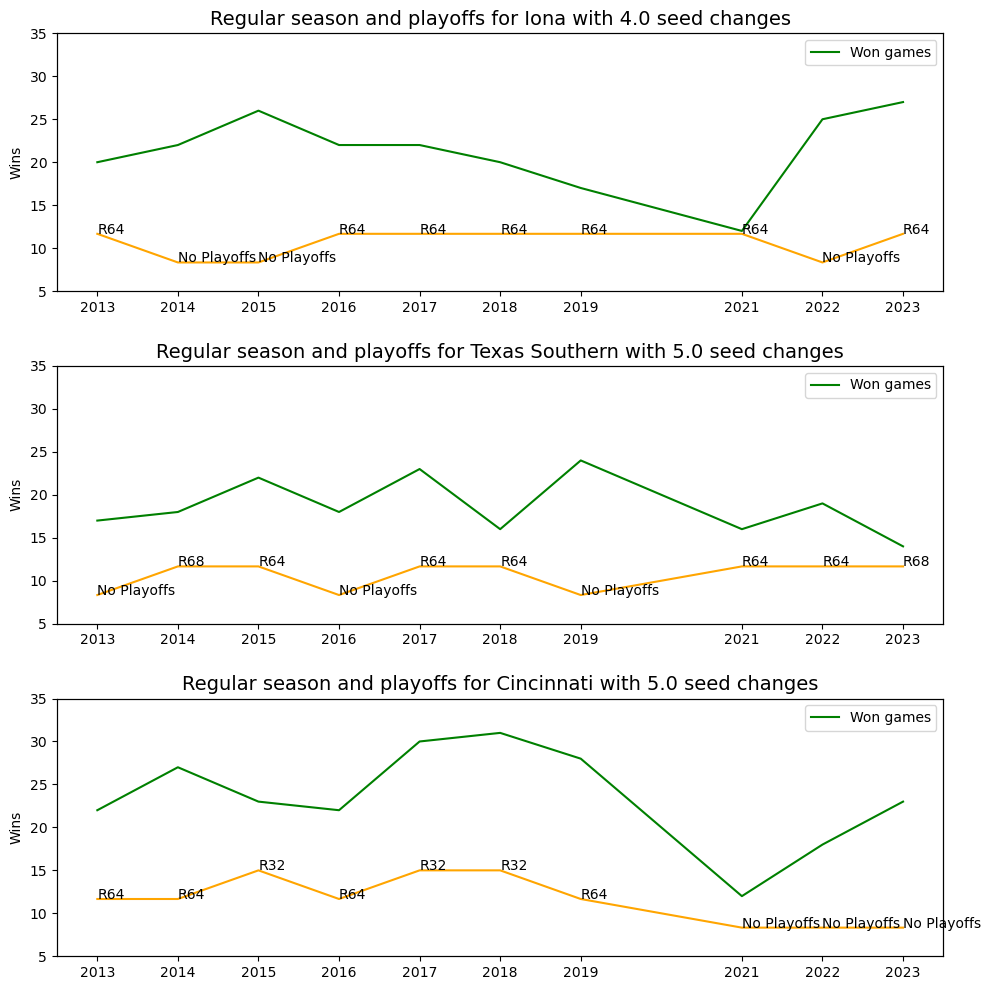

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    current_team = mediocre_teams.iloc[i]['TEAM']
    df_team = df_all_years[df_all_years['TEAM']== current_team].sort_values(by='YEAR').reset_index(drop=True)
    
    ax.plot(df_team["YEAR"], df_team["W"], color="green", label="Won games")
    ax2 = ax.twinx()
    ax2.plot(df_team["YEAR"], df_team["POSTSEASON_MAP"], color="orange")
    ax2.set_ylabel("")
    
    ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
    
    ax2.set_yticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax2.set_yticklabels([])
    ax2.tick_params(axis='y', which='both', length=0)

    for x, txt in enumerate(df_team["POSTSEASON"]):
        ax2.text(df_team["YEAR"][x], df_team["POSTSEASON_MAP"][x], txt, fontsize=10)
    
    ax.set_xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023])
    ax.set_xticklabels(["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2021", "2022", "2023"], fontsize=10)  # Opisy etykiet

    seed_changes = mediocre_teams.loc[mediocre_teams['TEAM'] == current_team,'CHANGE_PROGRESS'].iloc[0]
    ax.set_title(f'Regular season and playoffs for {current_team} with {seed_changes} seed changes', fontsize=14)
    ax.set_ylabel('Wins')
    ax.legend()
    
    plt.tight_layout(h_pad=2)
plt.show()